In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:

# Task 1: Data Retreival
stock_file = "C:/Users/bhatt/Desktop/Prac-DataScience/Assignment-2/NASDAQ.csv"
stock = pd.read_csv(stock_file, 
                  names = ['Date','Label','Open','High','Low','Close','Volume','InterestRate',
                           'ExchangeRate','VIX','Gold','Oil','TEDSpread','EFFR']) # Rename variable as per the requirement
stock = stock.drop(stock.index[0]) # drop the header row
stock.head() # To display the first 5 lines of the data to have an insight in data

,Date,Label,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
1,2008/4/1,0,2306.51001,2362.75,2305.399902,2362.75,2160120000,1.77,1.5615,22.68,897,100.92,1.3,2.38
2,2008/4/2,1,2363.419922,2381.209961,2347.780029,2361.399902,1996680000,1.72,1.5618,23.43,893.5,104.83,1.31,2.18
3,2008/4/3,1,2347.909912,2373.98999,2339.379883,2363.300049,1993480000,1.7,1.5667,23.21,898.25,103.92,1.35,2.19
4,2008/4/4,0,2366.909912,2391.929932,2351.76001,2370.97998,1977560000,1.67,1.5735,22.45,905.25,106.09,1.4,2.26
5,2008/4/7,0,2386.620117,2390.040039,2359.540039,2364.830078,1730020000,1.62,1.5713,22.42,914.7,108.91,1.28,2.24


In [3]:
stock.shape

(2448, 14)

In [4]:
stock.isna().sum()

Date            0
Label           0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
Gold            0
Oil             0
TEDSpread       0
EFFR            0
dtype: int64

In [5]:
stock['Label'].value_counts()

1    1363
0    1085
Name: Label, dtype: int64

In [6]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head() #Change the date format to better understandable date format

,Date,Label,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
1,2008-04-01,0,2306.51001,2362.75,2305.399902,2362.75,2160120000,1.77,1.5615,22.68,897,100.92,1.3,2.38
2,2008-04-02,1,2363.419922,2381.209961,2347.780029,2361.399902,1996680000,1.72,1.5618,23.43,893.5,104.83,1.31,2.18
3,2008-04-03,1,2347.909912,2373.98999,2339.379883,2363.300049,1993480000,1.7,1.5667,23.21,898.25,103.92,1.35,2.19
4,2008-04-04,0,2366.909912,2391.929932,2351.76001,2370.97998,1977560000,1.67,1.5735,22.45,905.25,106.09,1.4,2.26
5,2008-04-07,0,2386.620117,2390.040039,2359.540039,2364.830078,1730020000,1.62,1.5713,22.42,914.7,108.91,1.28,2.24


In [7]:
# as Date is not that important, se we can drop the date column from the dataset
#stock = stock.drop(['Date'], axis = 1)

In [8]:
# Task 2 : Descriptive Analysis
stockcopy = stock

# Assigning Right Data types
stock['Open'] = pd.to_numeric(stock['Open'],errors='coerce')
stock['High'] = pd.to_numeric(stock['High'],errors='coerce')
stock['Low'] = pd.to_numeric(stock['Low'],errors='coerce')
stock['Close'] = pd.to_numeric(stock['Close'],errors='coerce')
stock['Volume'] = pd.to_numeric(stock['Volume'],errors='coerce')
stock['InterestRate'] = pd.to_numeric(stock['InterestRate'],errors='coerce')
stock['ExchangeRate'] = pd.to_numeric(stock['ExchangeRate'],errors='coerce')
stock['VIX'] = pd.to_numeric(stock['VIX'],errors='coerce')
stock['Oil'] = pd.to_numeric(stock['Oil'],errors='coerce')
stock['Gold'] = pd.to_numeric(stock['Gold'],errors='coerce')
stock['TEDSpread'] = pd.to_numeric(stock['TEDSpread'],errors='coerce')
stock['EFFR'] = pd.to_numeric(stock['EFFR'],errors='coerce')
stock.dtypes

Date            datetime64[ns]
Label                   object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
InterestRate           float64
ExchangeRate           float64
VIX                    float64
Gold                   float64
Oil                    float64
TEDSpread              float64
EFFR                   float64
dtype: object

In [9]:
stock.describe()

,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
count,2448.000000,2448.000000,2448.000000,2448.000000,2.448000e+03,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,3724.890605,3745.813435,3701.598365,3725.518689,1.974838e+09,1.758832,1.281169,19.887296,1274.313991,75.563137,0.415776,0.382831
std,1503.781242,1506.786726,1500.069431,1503.920815,4.052348e+08,0.623806,0.130193,9.988958,241.554767,24.673508,0.457680,0.516170
min,1284.839966,1316.150024,1265.520020,1268.640015,0.000000e+00,0.470000,1.037500,9.140000,692.500000,26.190000,0.090000,0.040000
25%,2456.569946,2483.117431,2440.387512,2467.264953,1.739918e+09,1.310000,1.157950,13.547500,1144.875000,50.805000,0.210000,0.110000
50%,3245.350098,3252.900025,3228.904908,3244.685059,1.919330e+09,1.715000,1.301650,16.920000,1258.425000,78.495000,0.270000,0.150000
75%,4893.767334,4909.544922,4871.697388,4894.100097,2.150585e+09,2.330000,1.367925,22.510000,1374.500000,96.170000,0.400000,0.370000
max,7627.520020,7637.270020,7563.439941,7588.319824,4.553600e+09,2.910000,1.601000,80.860000,1891.000000,145.310000,4.580000,2.970000


In [10]:
# Re assign Label as Up and Down for better understanding
stock['Label'].replace('1', 'Up', inplace=True)
stock['Label'].replace('0', 'Down', inplace=True)
stock['Label'].value_counts()

Up      1363
Down    1085
Name: Label, dtype: int64

Text(0.5,1,'Stock Indicator : Up or Down')

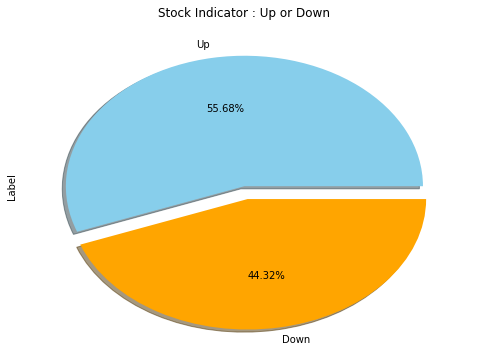

In [11]:
# Data Exploration
# Single Variable graphs
# Check the distribution of Label
plt.figure(figsize=(8,6))
explode = (0,0.1)
stock['Label'].value_counts().plot(kind='pie',colors=['skyblue','orange'],
                                          autopct='%.2f%%',shadow = True, explode = explode)
plt.title('Stock Indicator : Up or Down')

In [12]:
sns.set_style('whitegrid')

Text(0.5,0,'Amount at which Stock opens')

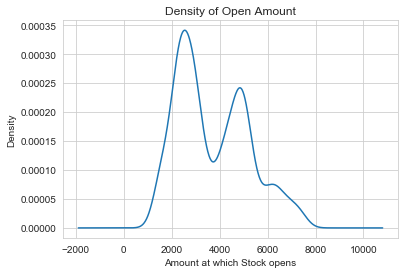

In [13]:
# Distribution of Open i.e. the value at which the stock opens
stock['Open'].plot(kind = "density")
plt.title("Density of Open Amount")
plt.xlabel("Amount at which Stock opens")

Text(0.5,1,'Stock High Amount')

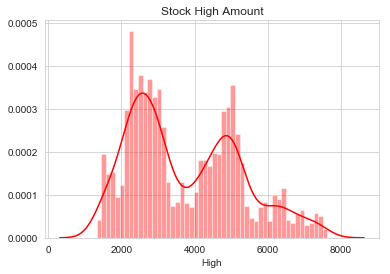

In [14]:
sns.distplot(stock['High'],kde = True, bins = 50, color = 'red')
plt.title('Stock High Amount')

Text(0.5,1,'Stock Low Amount')

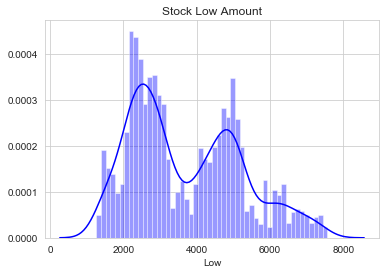

In [15]:
sns.distplot(stock['Low'],kde = True, bins = 50, color = 'blue')
plt.title('Stock Low Amount')

Text(0.5,0,'Close Amount')

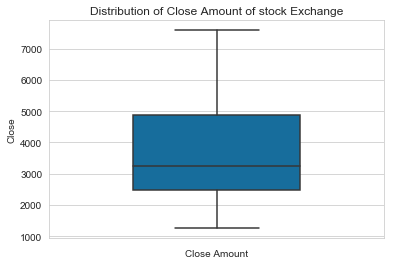

In [16]:
# Distribution of CLose Amount for stock Exchange
sns.boxplot(y = "Close",
            width = 0.5,
            data = stock,
            palette = "colorblind")
plt.title("Distribution of Close Amount of stock Exchange")
plt.xlabel("Close Amount")

Text(0.5,1,'Volume')

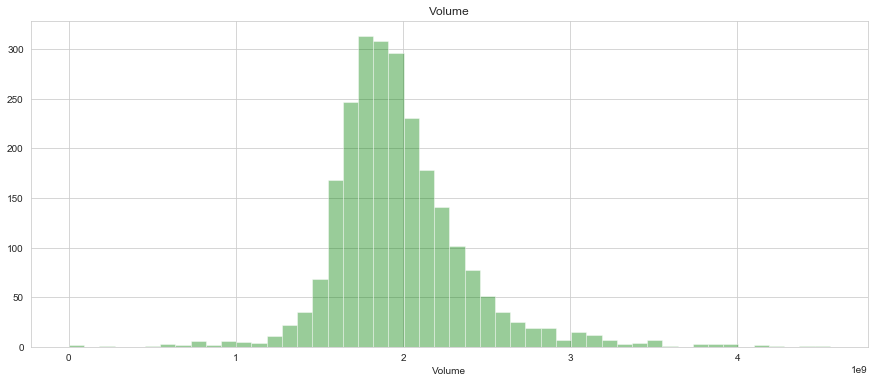

In [17]:
plt.figure(figsize=(15,6))
sns.distplot(stock['Volume'],kde = False, bins = 50, color = 'green')
plt.title('Volume')

Text(0.5,1,'Interest Rate Variations')

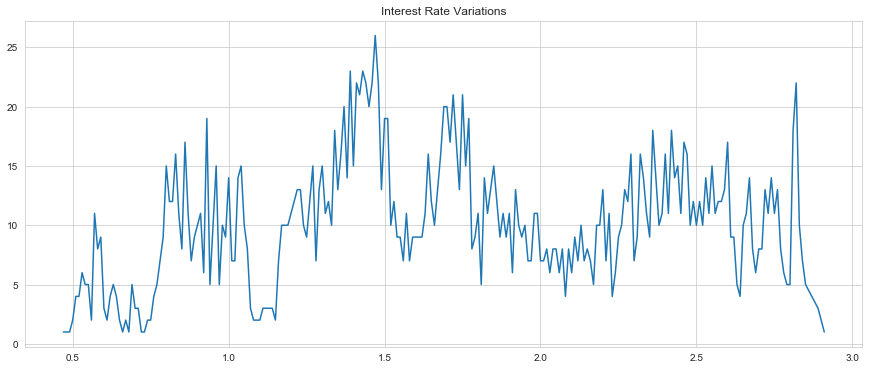

In [18]:
plt.figure(figsize=(15,6))
stock['InterestRate'].value_counts().sort_index().plot.line()
plt.title("Interest Rate Variations")

In [19]:
stock1 = stock
cols1 = ['Label','Open','High','Low','Close','Volume','InterestRate','VIX','Gold','Oil','TEDSpread','EFFR']
stock1 = stock1.drop(cols1,axis = 1, inplace = False)
stock1 = stock1.sort_values('Date')
stock1.isnull().sum()


Date            0
ExchangeRate    0
dtype: int64

In [20]:
stock1 = stock1.groupby('Date')['ExchangeRate'].sum().reset_index()

In [21]:
stock1 = stock1.set_index('Date')
stock1.index

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-07', '2008-04-08', '2008-04-09', '2008-04-10',
               '2008-04-11', '2008-04-14',
               ...
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', name=u'Date', length=2448, freq=None)

In [22]:
x = stock1['ExchangeRate'].resample('MS').mean()

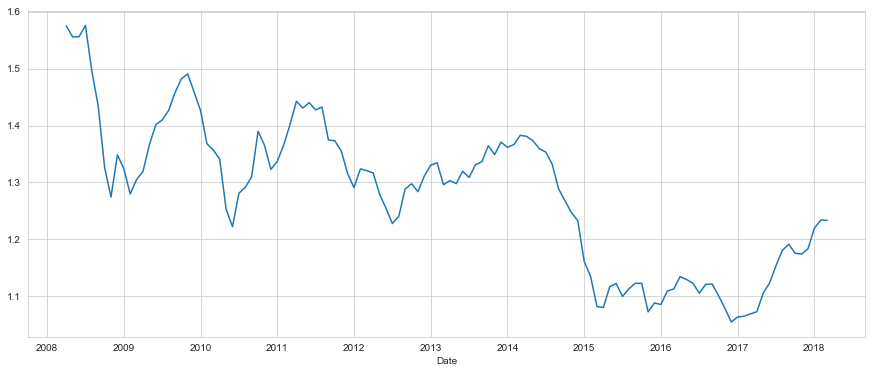

In [23]:
x.plot(figsize=(15,6))
plt.show()

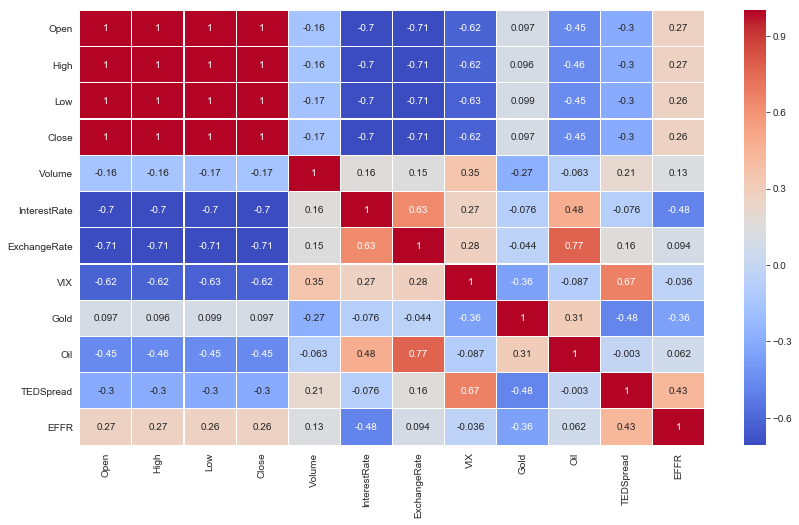

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(stock.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [25]:
stock2 = stock
cols2 = ['Label','High','Low','Close','Volume','InterestRate','ExchangeRate','VIX','Gold','Oil','TEDSpread','EFFR']
stock2 = stock2.drop(cols2,axis = 1, inplace = False)
stock2 = stock2.sort_values('Date')
stock2.isnull().sum()

Date    0
Open    0
dtype: int64

In [26]:
stock2 = stock2.groupby('Date')['Open'].sum().reset_index()

In [27]:
stock2 = stock2.set_index('Date')
stock2.index

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-07', '2008-04-08', '2008-04-09', '2008-04-10',
               '2008-04-11', '2008-04-14',
               ...
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', name=u'Date', length=2448, freq=None)

In [28]:
y = stock2['Open'].resample('MS').mean()

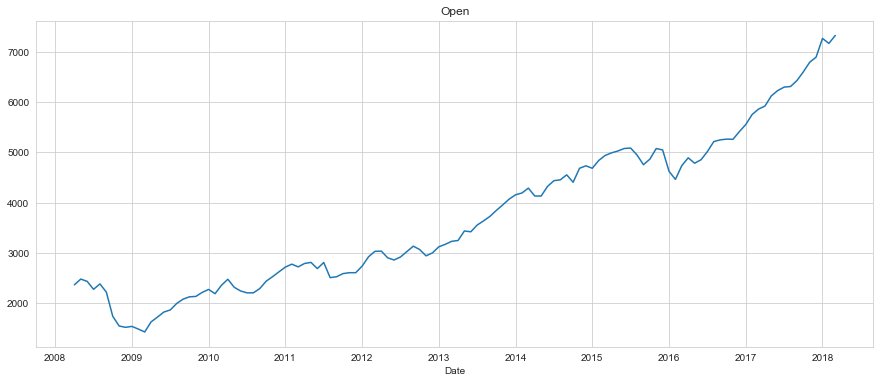

In [29]:
y.plot(figsize=(15,6))
plt.title("Open")
plt.show()

Text(0.5,1,'VIX')

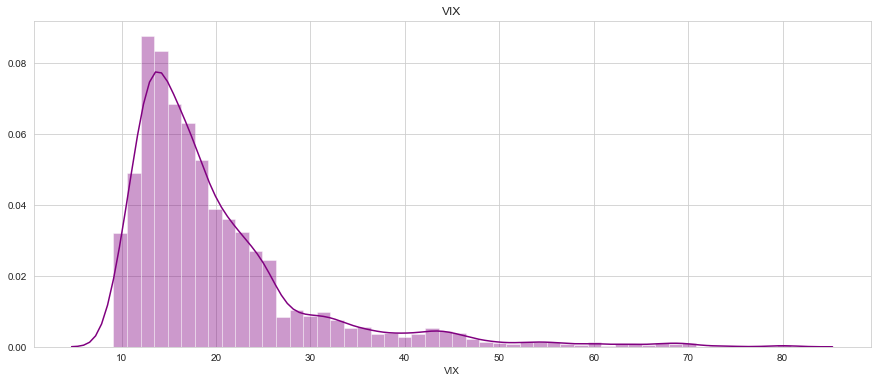

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(stock['VIX'],kde = True, bins = 50, color = 'purple')
plt.title('VIX')

In [31]:
# Time series price of gold
stock3 = stock
cols3 = ['Label','Open','High','Low','Close','Volume','InterestRate','ExchangeRate','VIX','Oil','TEDSpread','EFFR']
stock3 = stock3.drop(cols3,axis = 1, inplace = False)
stock3 = stock3.sort_values('Date')
stock3.isnull().sum()

Date    0
Gold    0
dtype: int64

In [32]:
stock3 = stock3.groupby('Date')['Gold'].sum().reset_index()

In [33]:
stock3 = stock3.set_index('Date')
stock3.index

DatetimeIndex(['2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04',
               '2008-04-07', '2008-04-08', '2008-04-09', '2008-04-10',
               '2008-04-11', '2008-04-14',
               ...
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', name=u'Date', length=2448, freq=None)

In [34]:
y = stock3['Gold'].resample('MS').mean()

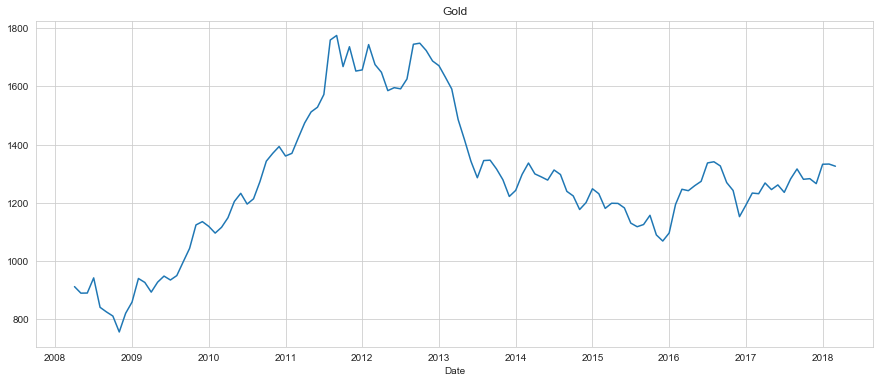

In [35]:
y.plot(figsize=(15,6))
plt.title("Gold")
plt.show()


Text(0.5,1,'Oil Price Variations')

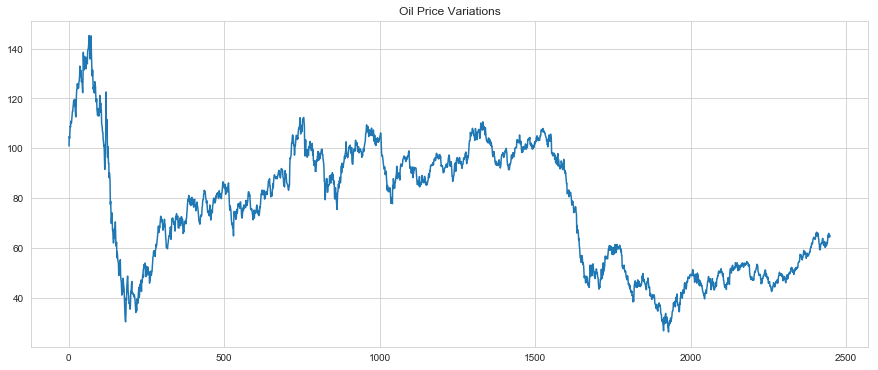

In [36]:
plt.figure(figsize=(15,6))
stock['Oil'].plot.line()
plt.title("Oil Price Variations")

Text(0.5,1,'TEDSpread ')

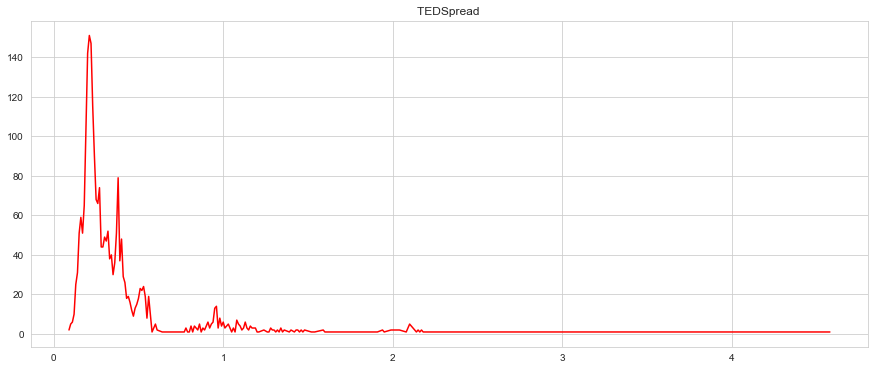

In [37]:
plt.figure(figsize=(15,6))
stock['TEDSpread'].value_counts().sort_index().plot.line(color = 'red')
plt.title("TEDSpread ")

Text(0.5,1,'EFFR')

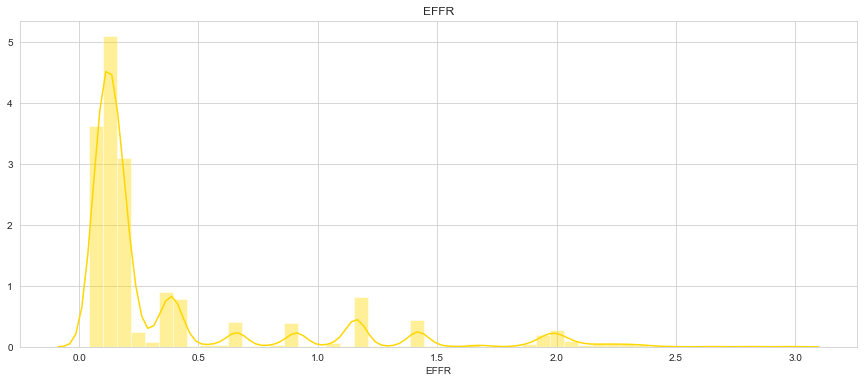

In [38]:
plt.figure(figsize=(15,6))
sns.distplot(stock['EFFR'],kde = True, bins = 50, color = 'gold')
plt.title('EFFR')

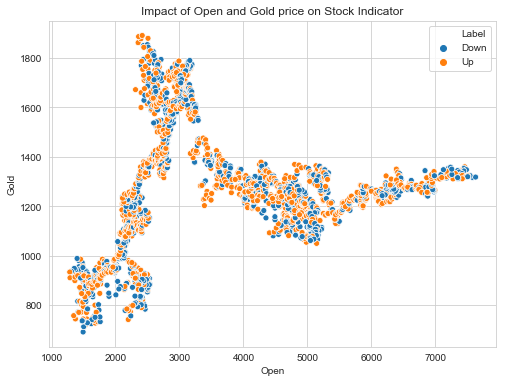

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open',y='Gold',data=stock,hue='Label')
plt.title('Impact of Open and Gold price on Stock Indicator')
plt.show()

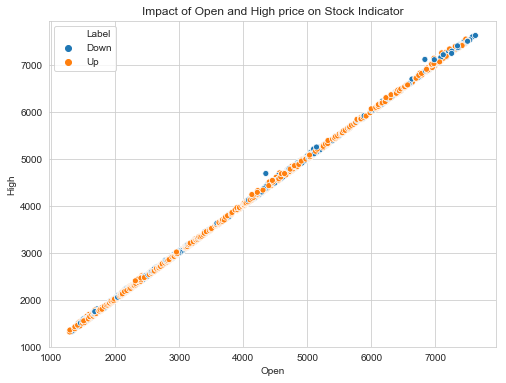

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open',y='High',data=stock,hue='Label')
plt.title('Impact of Open and High price on Stock Indicator')
plt.show()

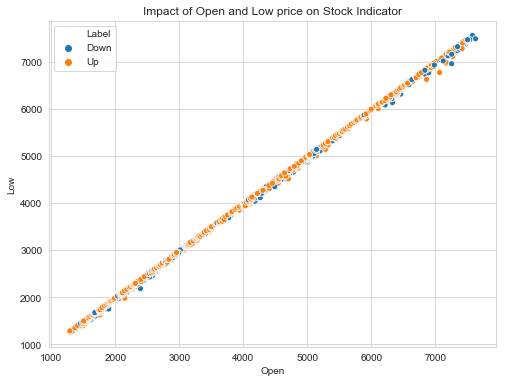

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open',y='Low',data=stock,hue='Label')
plt.title('Impact of Open and Low price on Stock Indicator')
plt.show()

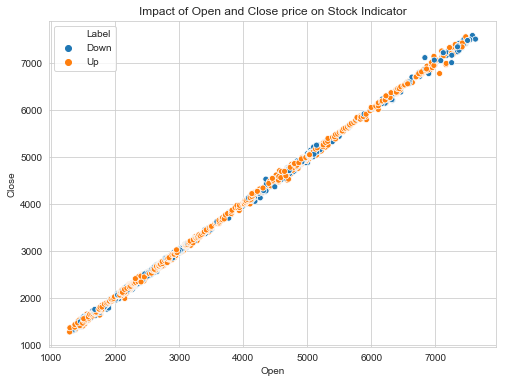

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open',y='Close',data=stock,hue='Label')
plt.title('Impact of Open and Close price on Stock Indicator')
plt.show()

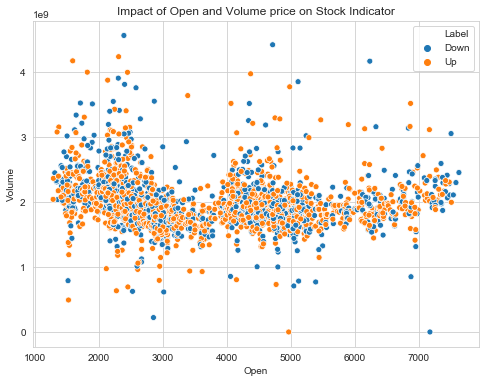

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Open',y='Volume',data=stock,hue='Label')
plt.title('Impact of Open and Volume price on Stock Indicator')
plt.show()

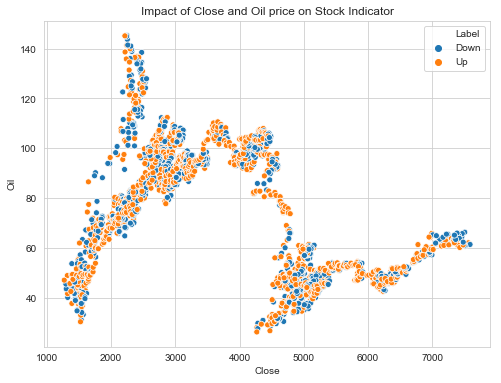

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Close',y='Oil',data=stock,hue='Label')
plt.title('Impact of Close and Oil price on Stock Indicator')
plt.show()

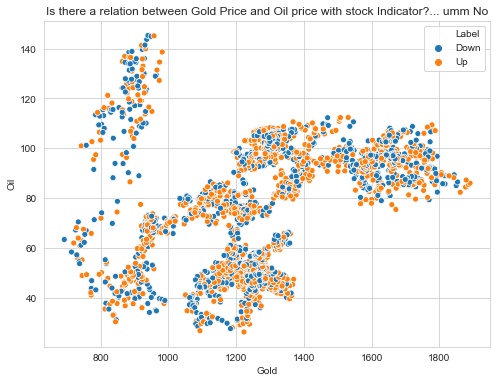

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Gold',y='Oil',data=stock,hue='Label')
plt.title('Is there a relation between Gold Price and Oil price with stock Indicator?... umm No')
plt.show()

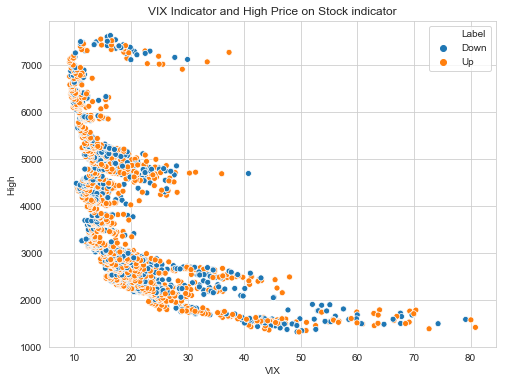

In [46]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='VIX',y='High',data=stock,hue='Label')
plt.title('VIX Indicator and High Price on Stock indicator')
plt.show()

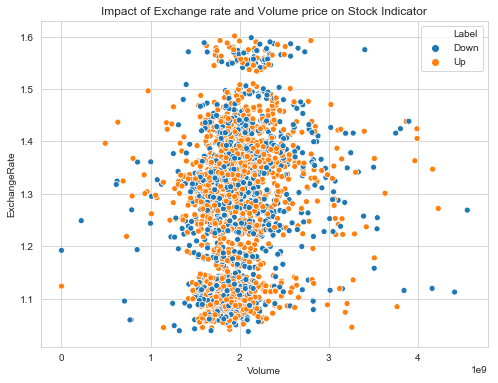

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Volume',y='ExchangeRate',data=stock,hue='Label')
plt.title('Impact of Exchange rate and Volume price on Stock Indicator')
plt.show()

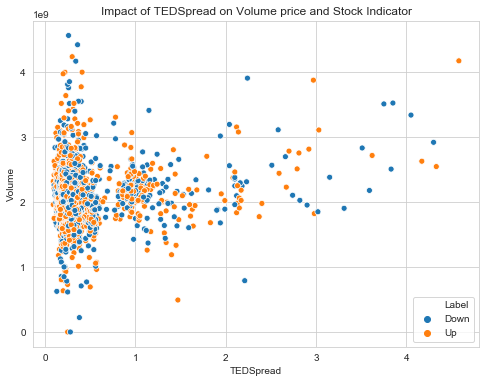

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TEDSpread',y='Volume',data=stock,hue='Label')
plt.title('Impact of TEDSpread on Volume price and Stock Indicator')
plt.show()

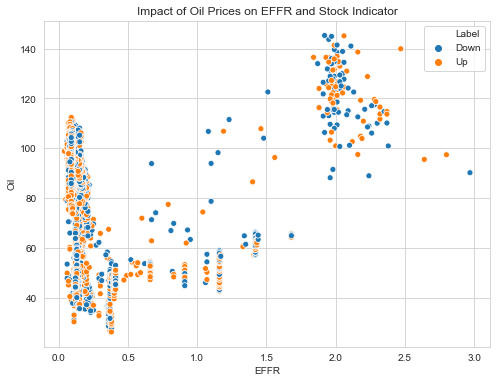

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='EFFR',y='Oil',data=stock,hue='Label')
plt.title('Impact of Oil Prices on EFFR and Stock Indicator')
plt.show()

In [50]:
# as Date is not that important, se we can drop the date column from the dateset
stock = stock.drop(['Date'], axis = 1)
stock['Label'].replace('Up','1', inplace=True)
stock['Label'].replace('Down','0',  inplace=True)

In [51]:
stock['Label'] = stock['Label'].astype('int64')

In [52]:
stock4 = pd.get_dummies(stock, drop_first=True)
stock4.head()

,Label,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
1,0,2306.510010,2362.750000,2305.399902,2362.750000,2.160120e+09,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
2,1,2363.419922,2381.209961,2347.780029,2361.399902,1.996680e+09,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
3,1,2347.909912,2373.989990,2339.379883,2363.300049,1.993480e+09,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
4,0,2366.909912,2391.929932,2351.760010,2370.979980,1.977560e+09,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
5,0,2386.620117,2390.040039,2359.540039,2364.830078,1.730020e+09,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


In [53]:
# Splittong the dataset into test and training se
X = stock4.drop('Label',axis = 1)
Y = stock4['Label']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [56]:
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [57]:
model = GridSearchCV(knn,params,cv=10)

In [58]:
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 29}

In [59]:
predict = model.predict(X_test)

In [60]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

('Accuracy Score: ', 0.4993197278911565)
('Using k-NN we get an accuracy score of: ', 49.932, '%')


In [61]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[ 69, 265],
       [103, 298]], dtype=int64)

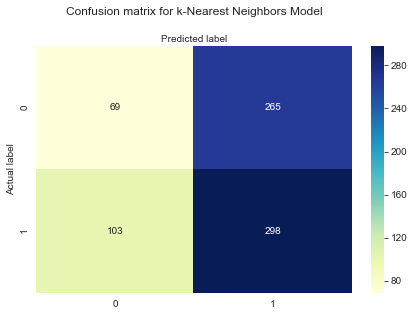

In [62]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [63]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.40      0.21      0.27       334
           1       0.53      0.74      0.62       401

   micro avg       0.50      0.50      0.50       735
   macro avg       0.47      0.47      0.45       735
weighted avg       0.47      0.50      0.46       735



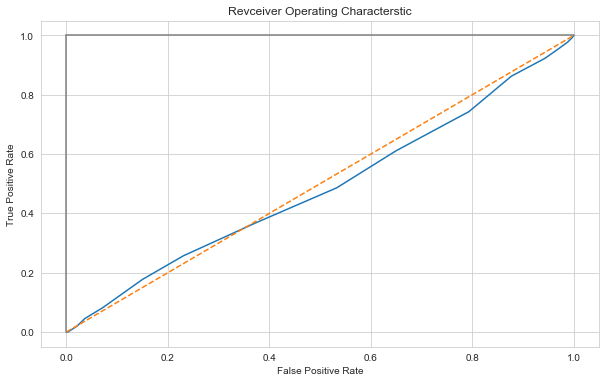

In [64]:
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [65]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.48536592650111243

In [66]:
dtree= DecisionTreeClassifier(random_state=7)

In [67]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [68]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}

In [69]:
predict1 = tree_model.predict(X_test)

In [70]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

('Accuracy Score: ', 0.4993197278911565)
('Using Decision Tree we get an accuracy score of: ', 49.932, '%')


In [71]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.48      0.50      0.49       334
           1       0.57      0.55      0.56       401

   micro avg       0.53      0.53      0.53       735
   macro avg       0.52      0.52      0.52       735
weighted avg       0.53      0.53      0.53       735



In [72]:
cnf_matrix = confusion_matrix(y_test,predict1)
cnf_matrix

array([[166, 168],
       [181, 220]], dtype=int64)

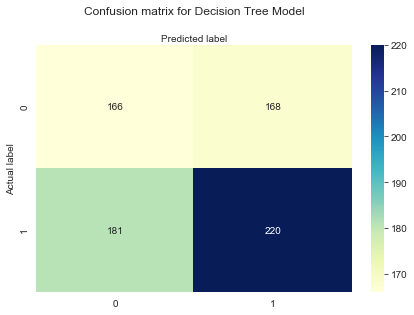

In [73]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [74]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [75]:
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

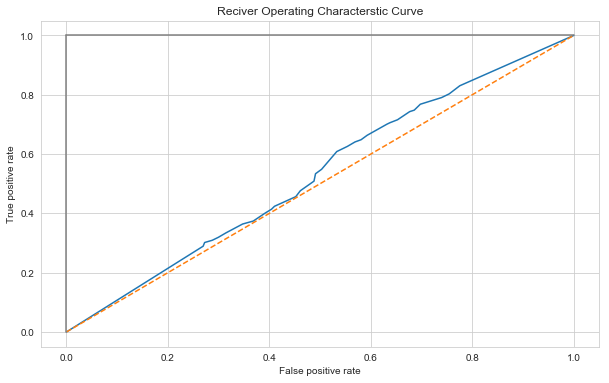

In [76]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [77]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_tree)

0.5301305120432452

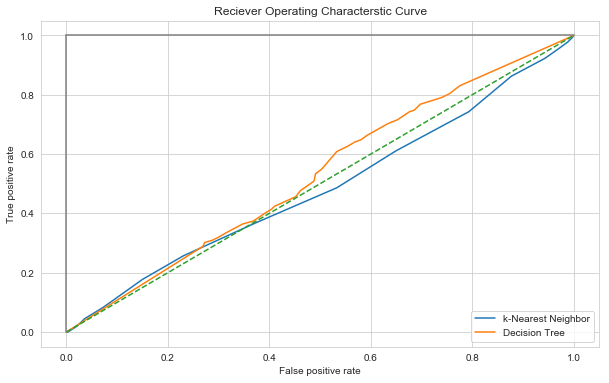

In [78]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciever Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()